In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df_1 = pd.read_csv('data/archive/15_9-23.csv')
df_2 = pd.read_csv('data/archive/16_2-7.csv')
df_3 = pd.read_csv('data/archive/16_7-6.csv')
df_4 = pd.read_csv('data/archive/17_4-1.csv')
#df_5 = pd.read_csv('data/archive/25_5_3_well.csv')
#df_6 = pd.read_csv('data/archive/25_10_10_well.csv')
df_7 = pd.read_csv('data/archive/25_10-9.csv')
#df_8 = pd.read_csv('data/archive/25_11_24_well.csv')
df_9 = pd.read_csv('data/archive/31_2-10.csv')
df_10 = pd.read_csv('data/archive/31_2-21 S.csv')
df_11 = pd.read_csv('data/archive/31_6-5.csv')
df_12 = pd.read_csv('data/archive/31_6-8.csv')
#df_13 = pd.read_csv('data/archive/34_3_3_A_well.csv')
df_14 = pd.read_csv('data/archive/34_3-2 S.csv')
#df_15 = pd.read_csv('data/archive/34_6_1_S_well.csv')
#df_16 = pd.read_csv('data/archive/34_10_16_R_well.csv')
#df_17 = pd.read_csv('data/archive/35_6_2_S_well.csv')
#df_18 = pd.read_csv('data/archive/35_9_8_well.csv')
df_19 = pd.read_csv('data/archive/35_9-7.csv')
#df_20 = pd.read_csv('data/archive/29_3_1_well.csv')

In [10]:
df_11["DEPTH_MD"] = df_11['DEPT']
df_11['WELL'] = '31/6-5'
df_11.drop(columns=['Unnamed: 0', 'DEPT'], inplace=True)

df_12["DEPTH_MD"] = df_12['DEPT']
df_12['WELL'] = '31/6-8'
df_12.drop(columns=['Unnamed: 0', 'DEPT'], inplace=True)

In [11]:
init_df = pd.concat([df_1, df_2, df_3, df_4, df_7, df_9, df_10, df_11, df_12, df_14, df_19])

In [44]:
init_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122117 entries, 0 to 10676
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   WELL                               122117 non-null  object 
 1   DEPTH_MD                           122117 non-null  float64
 2   X_LOC                              121744 non-null  float64
 3   Y_LOC                              121744 non-null  float64
 4   Z_LOC                              121744 non-null  float64
 5   GROUP                              100793 non-null  object 
 6   FORMATION                          94800 non-null   object 
 7   CALI                               108828 non-null  float64
 8   RSHA                               21384 non-null   float64
 9   RMED                               115198 non-null  float64
 10  RDEP                               121744 non-null  float64
 11  RHOB                               113800 non

In [45]:
init_df.describe()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
count,122117.000000,121744.000000,1.217440e+05,121744.000000,108828.000000,21384.000000,115198.000000,121744.000000,113800.000000,121978.000000,...,91150.000000,65972.000000,43104.000000,113107.000000,0.0,15181.000000,64221.000000,10436.000000,121424.000000,121407.000000
mean,2071.262185,498232.349685,6.631551e+06,-2041.771341,12.091287,24.564181,3.390519,25.133122,2.298473,72.964127,...,36.002535,231.101592,0.244774,0.019275,NaN,3.089212,35.830181,138.450467,63925.205643,1.127974
std,832.755968,37936.875919,1.417470e+05,821.576108,2.742063,186.373996,36.409580,109.828399,0.219175,35.505278,...,42.339898,92.582975,0.771045,0.085262,NaN,9.965275,39.459786,476.842564,14644.045856,0.410886
min,326.375000,433906.750000,6.458300e+06,-4286.082520,8.025192,0.119106,0.000100,0.000100,1.127937,1.132300,...,0.000000,86.628220,-5.500000,-1.959390,NaN,0.132760,0.115860,0.120551,30000.000000,1.000000
25%,1467.388434,452405.906250,6.495507e+06,-2594.964538,8.931146,0.703996,0.791395,0.835585,2.157067,50.977278,...,14.561207,154.954464,0.009263,-0.005725,NaN,0.901667,14.891059,0.614246,65000.000000,1.000000
50%,2007.596434,515574.437500,6.552710e+06,-1978.170959,12.317390,0.956691,1.241712,1.325980,2.314811,74.714176,...,24.080531,202.735771,0.172958,0.017535,NaN,1.474687,24.024317,1.169075,65000.000000,1.000000
75%,2640.950800,536104.687500,6.759830e+06,-1447.033447,12.711713,1.672834,2.020036,2.552751,2.475366,95.784031,...,39.772709,313.124481,0.426309,0.053417,NaN,3.143365,39.383507,2.282429,65030.000000,1.000000
max,4319.790800,544117.437500,6.853475e+06,-353.230408,24.312500,1999.717041,1996.104614,1999.750732,3.209886,1141.292114,...,694.254578,562.037109,8.380077,0.675181,NaN,621.158386,439.485748,2030.926148,99000.000000,3.000000


<Axes: >

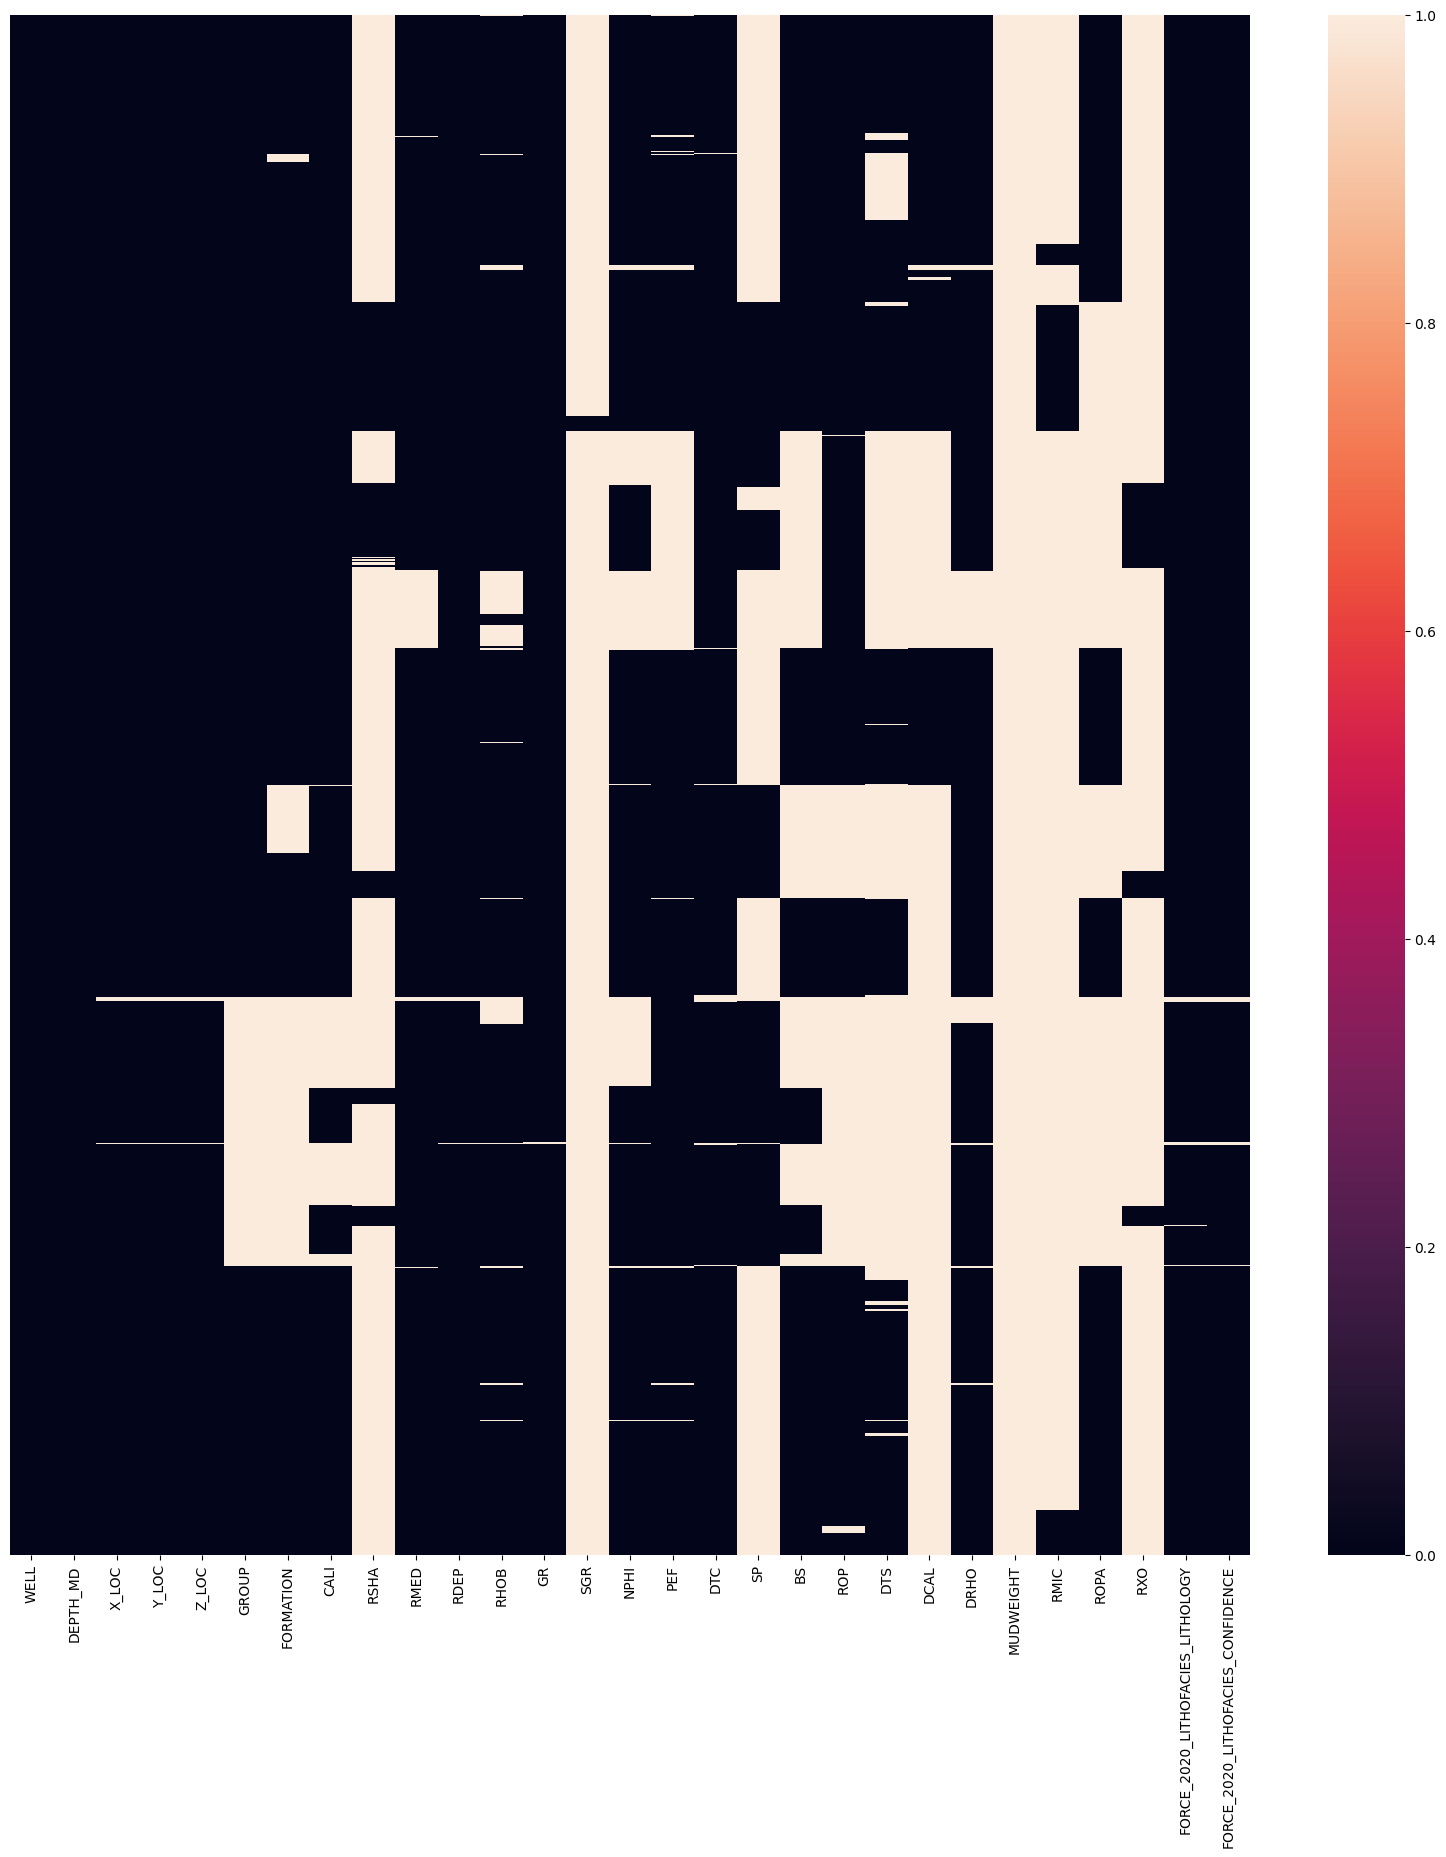

In [12]:
plt.figure(figsize=(20, 20))
sns.heatmap(init_df.isnull(), yticklabels=False)

In [13]:
df_1 = df_1.dropna(subset=['FORCE_2020_LITHOFACIES_LITHOLOGY'])
df_2 = df_2.dropna(subset=['FORCE_2020_LITHOFACIES_LITHOLOGY'])
df_3 = df_3.dropna(subset=['FORCE_2020_LITHOFACIES_LITHOLOGY'])
df_4 = df_4.dropna(subset=['FORCE_2020_LITHOFACIES_LITHOLOGY'])
df_7 = df_7.dropna(subset=['FORCE_2020_LITHOFACIES_LITHOLOGY'])
df_9 = df_9.dropna(subset=['FORCE_2020_LITHOFACIES_LITHOLOGY'])
df_10 = df_10.dropna(subset=['FORCE_2020_LITHOFACIES_LITHOLOGY'])
df_11 = df_11.dropna(subset=['FORCE_2020_LITHOFACIES_LITHOLOGY'])
df_12 = df_12.dropna(subset=['FORCE_2020_LITHOFACIES_LITHOLOGY'])
df_14 = df_14.dropna(subset=['FORCE_2020_LITHOFACIES_LITHOLOGY'])
df_19 = df_19.dropna(subset=['FORCE_2020_LITHOFACIES_LITHOLOGY'])

In [14]:
columns=['WELL', 'RSHA', 'SGR', 'MUDWEIGHT', 'RMIC', 'RXO', 'SP', "GROUP", "FORMATION"]

df_1 = df_1.drop(columns=columns)
df_2 = df_2.drop(columns=columns)
df_3 = df_3.drop(columns=columns)
df_4 = df_4.drop(columns=columns)
df_7 = df_7.drop(columns=columns)
df_9 = df_9.drop(columns=columns)
df_10 = df_10.drop(columns=columns)
df_11 = df_11.drop(columns=['WELL', 'RSHA', 'SP'])
df_12 = df_12.drop(columns=['WELL', 'RSHA', 'RXO', 'SP'])
df_14 = df_14.drop(columns=columns)
df_19 = df_19.drop(columns=columns)

In [15]:
df_1.columns

Index(['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'CALI', 'RMED', 'RDEP', 'RHOB',
       'GR', 'NPHI', 'PEF', 'DTC', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'ROPA',
       'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE'],
      dtype='object')

In [16]:
df_1 = df_1.fillna(method='ffill')
df_2 = df_2.fillna(method='ffill')
df_3 = df_3.fillna(method='ffill')
df_4 = df_4.fillna(method='ffill')
df_7 = df_7.fillna(method='ffill')
df_9 = df_9.fillna(method='ffill')
df_10 = df_10.fillna(method='ffill')
df_11 = df_11.fillna(method='ffill')
df_12 = df_12.fillna(method='ffill')
df_14 = df_14.fillna(method='ffill')
df_19 = df_19.fillna(method='ffill')

In [17]:
df_19.columns

Index(['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'CALI', 'RMED', 'RDEP', 'RHOB',
       'GR', 'NPHI', 'PEF', 'DTC', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'ROPA',
       'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE'],
      dtype='object')

In [18]:
df_1 = df_1.fillna(df_1.mean())
df_2 = df_2.fillna(df_2.mean())
df_3 = df_3.fillna(df_3.mean())
df_4 = df_4.fillna(df_4.mean())
df_7 = df_7.fillna(df_7.mean())
df_9 = df_9.fillna(df_9.mean())
df_10 = df_10.fillna(df_10.mean())
df_11 = df_11.fillna(df_11.mean())
df_12 = df_12.fillna(df_12.mean())
df_14 = df_14.fillna(df_14.mean())
df_19 = df_19.fillna(df_19.mean())

In [19]:
df = pd.concat([df_1, df_2, df_3, df_4, df_7, df_9, df_10, df_11, df_12, df_14, df_19])

In [20]:
df_1.columns

Index(['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'CALI', 'RMED', 'RDEP', 'RHOB',
       'GR', 'NPHI', 'PEF', 'DTC', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'ROPA',
       'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE'],
      dtype='object')

In [21]:
df.columns

Index(['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'CALI', 'RMED', 'RDEP', 'RHOB',
       'GR', 'NPHI', 'PEF', 'DTC', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'ROPA',
       'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE'],
      dtype='object')

In [22]:
df.isna().sum()

DEPTH_MD                                 0
X_LOC                                    0
Y_LOC                                    0
Z_LOC                                    0
CALI                                     0
RMED                                     0
RDEP                                     0
RHOB                                     0
GR                                       0
NPHI                                     0
PEF                                  17271
DTC                                      0
BS                                   26304
ROP                                  29664
DTS                                  46935
DCAL                                 77668
DRHO                                     0
ROPA                                 57157
FORCE_2020_LITHOFACIES_LITHOLOGY         0
FORCE_2020_LITHOFACIES_CONFIDENCE        0
dtype: int64

In [23]:
df = df.fillna(df.mean())

In [24]:
df.isna().sum()

DEPTH_MD                             0
X_LOC                                0
Y_LOC                                0
Z_LOC                                0
CALI                                 0
RMED                                 0
RDEP                                 0
RHOB                                 0
GR                                   0
NPHI                                 0
PEF                                  0
DTC                                  0
BS                                   0
ROP                                  0
DTS                                  0
DCAL                                 0
DRHO                                 0
ROPA                                 0
FORCE_2020_LITHOFACIES_LITHOLOGY     0
FORCE_2020_LITHOFACIES_CONFIDENCE    0
dtype: int64

<Axes: >

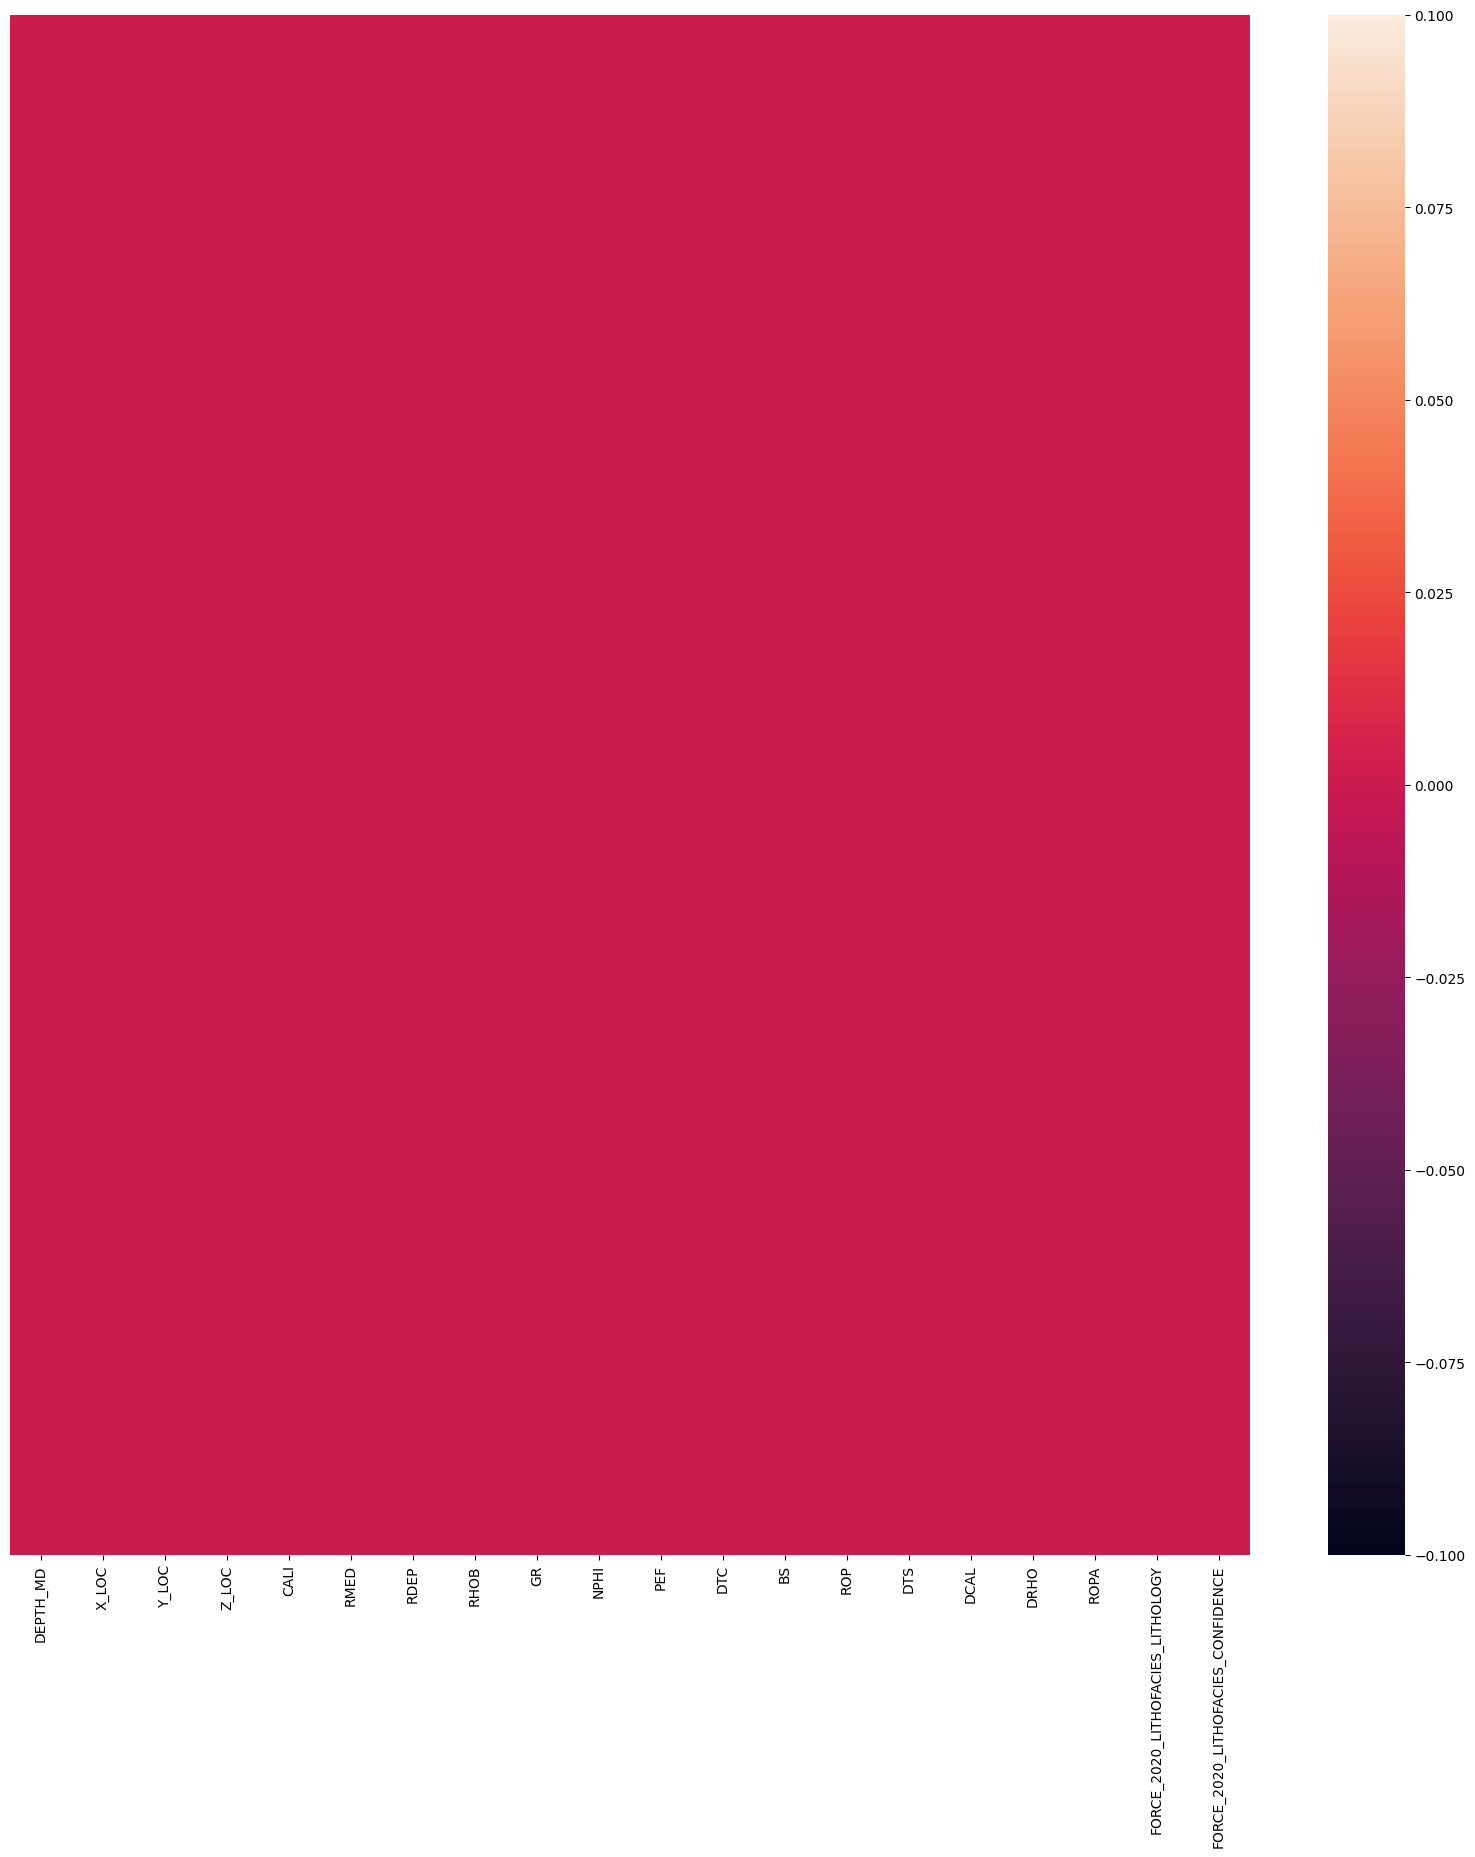

In [46]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.isnull(), yticklabels=False)

In [25]:
df.columns

Index(['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'CALI', 'RMED', 'RDEP', 'RHOB',
       'GR', 'NPHI', 'PEF', 'DTC', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'ROPA',
       'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE'],
      dtype='object')

In [26]:
len(list(df.columns))

20

In [27]:
df.shape

(121424, 20)

In [28]:
df.dtypes

DEPTH_MD                             float64
X_LOC                                float64
Y_LOC                                float64
Z_LOC                                float64
CALI                                 float64
RMED                                 float64
RDEP                                 float64
RHOB                                 float64
GR                                   float64
NPHI                                 float64
PEF                                  float64
DTC                                  float64
BS                                   float64
ROP                                  float64
DTS                                  float64
DCAL                                 float64
DRHO                                 float64
ROPA                                 float64
FORCE_2020_LITHOFACIES_LITHOLOGY     float64
FORCE_2020_LITHOFACIES_CONFIDENCE    float64
dtype: object

In [47]:
corr_matrix = df.corr()
corr_matrix

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,BS,ROP,DTS,DCAL,DRHO,ROPA,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
DEPTH_MD,1.000000,-0.213273,0.092890,-0.999133,-0.339256,0.067791,0.327077,0.600407,-0.122326,-0.481368,0.239562,-0.721612,-0.166490,-0.093001,-0.317349,-0.094718,0.206899,-0.077096,0.073104,-0.083669
X_LOC,-0.213273,1.000000,0.638298,0.222854,-0.040278,0.030045,0.105112,-0.194227,-0.031817,0.004169,-0.342727,-0.009153,-0.400763,-0.322229,-0.215107,0.079227,0.074486,-0.289776,-0.043115,-0.011708
Y_LOC,0.092890,0.638298,1.000000,-0.083448,-0.206903,-0.011458,-0.196099,0.091462,0.235281,0.090558,-0.088904,0.006684,-0.254770,-0.208838,-0.228403,0.020999,0.018211,-0.257565,-0.123998,0.012153
Z_LOC,-0.999133,0.222854,-0.083448,1.000000,0.329057,-0.068185,-0.331792,-0.597719,0.128325,0.482181,-0.243078,0.717706,0.151741,0.088640,0.308527,0.095531,-0.203477,0.071036,-0.077731,0.081185
CALI,-0.339256,-0.040278,-0.206903,0.329057,1.000000,-0.061279,-0.001436,-0.349130,-0.177480,0.303069,0.153837,0.367375,0.580992,0.075088,0.250790,0.116075,-0.023801,0.152712,0.171639,0.022039
RMED,0.067791,0.030045,-0.011458,-0.068185,-0.061279,1.000000,0.441429,0.060972,-0.088524,-0.118346,0.001647,-0.115626,-0.072299,-0.044167,-0.081704,-0.011620,0.027794,-0.038799,0.036553,-0.020930
RDEP,0.327077,0.105112,-0.196099,-0.331792,-0.001436,0.441429,1.000000,-0.171816,-0.404599,-0.164963,-0.000356,-0.322108,-0.025528,-0.133708,-0.028946,-0.003964,0.197956,-0.013430,0.340607,-0.070129
RHOB,0.600407,-0.194227,0.091462,-0.597719,-0.349130,0.060972,-0.171816,1.000000,0.041314,-0.575721,0.132736,-0.634936,-0.174228,-0.077525,-0.356929,-0.091606,0.199887,-0.137994,-0.062835,-0.095545
GR,-0.122326,-0.031817,0.235281,0.128325,-0.177480,-0.088524,-0.404599,0.041314,1.000000,0.357279,-0.019204,0.332648,-0.046219,0.208595,0.088823,0.061743,-0.070997,0.121209,-0.079367,0.012911
NPHI,-0.481368,0.004169,0.090558,0.482181,0.303069,-0.118346,-0.164963,-0.575721,0.357279,1.000000,0.070801,0.745272,0.307083,0.197252,0.554465,0.149861,-0.125611,0.156834,0.085599,0.020292


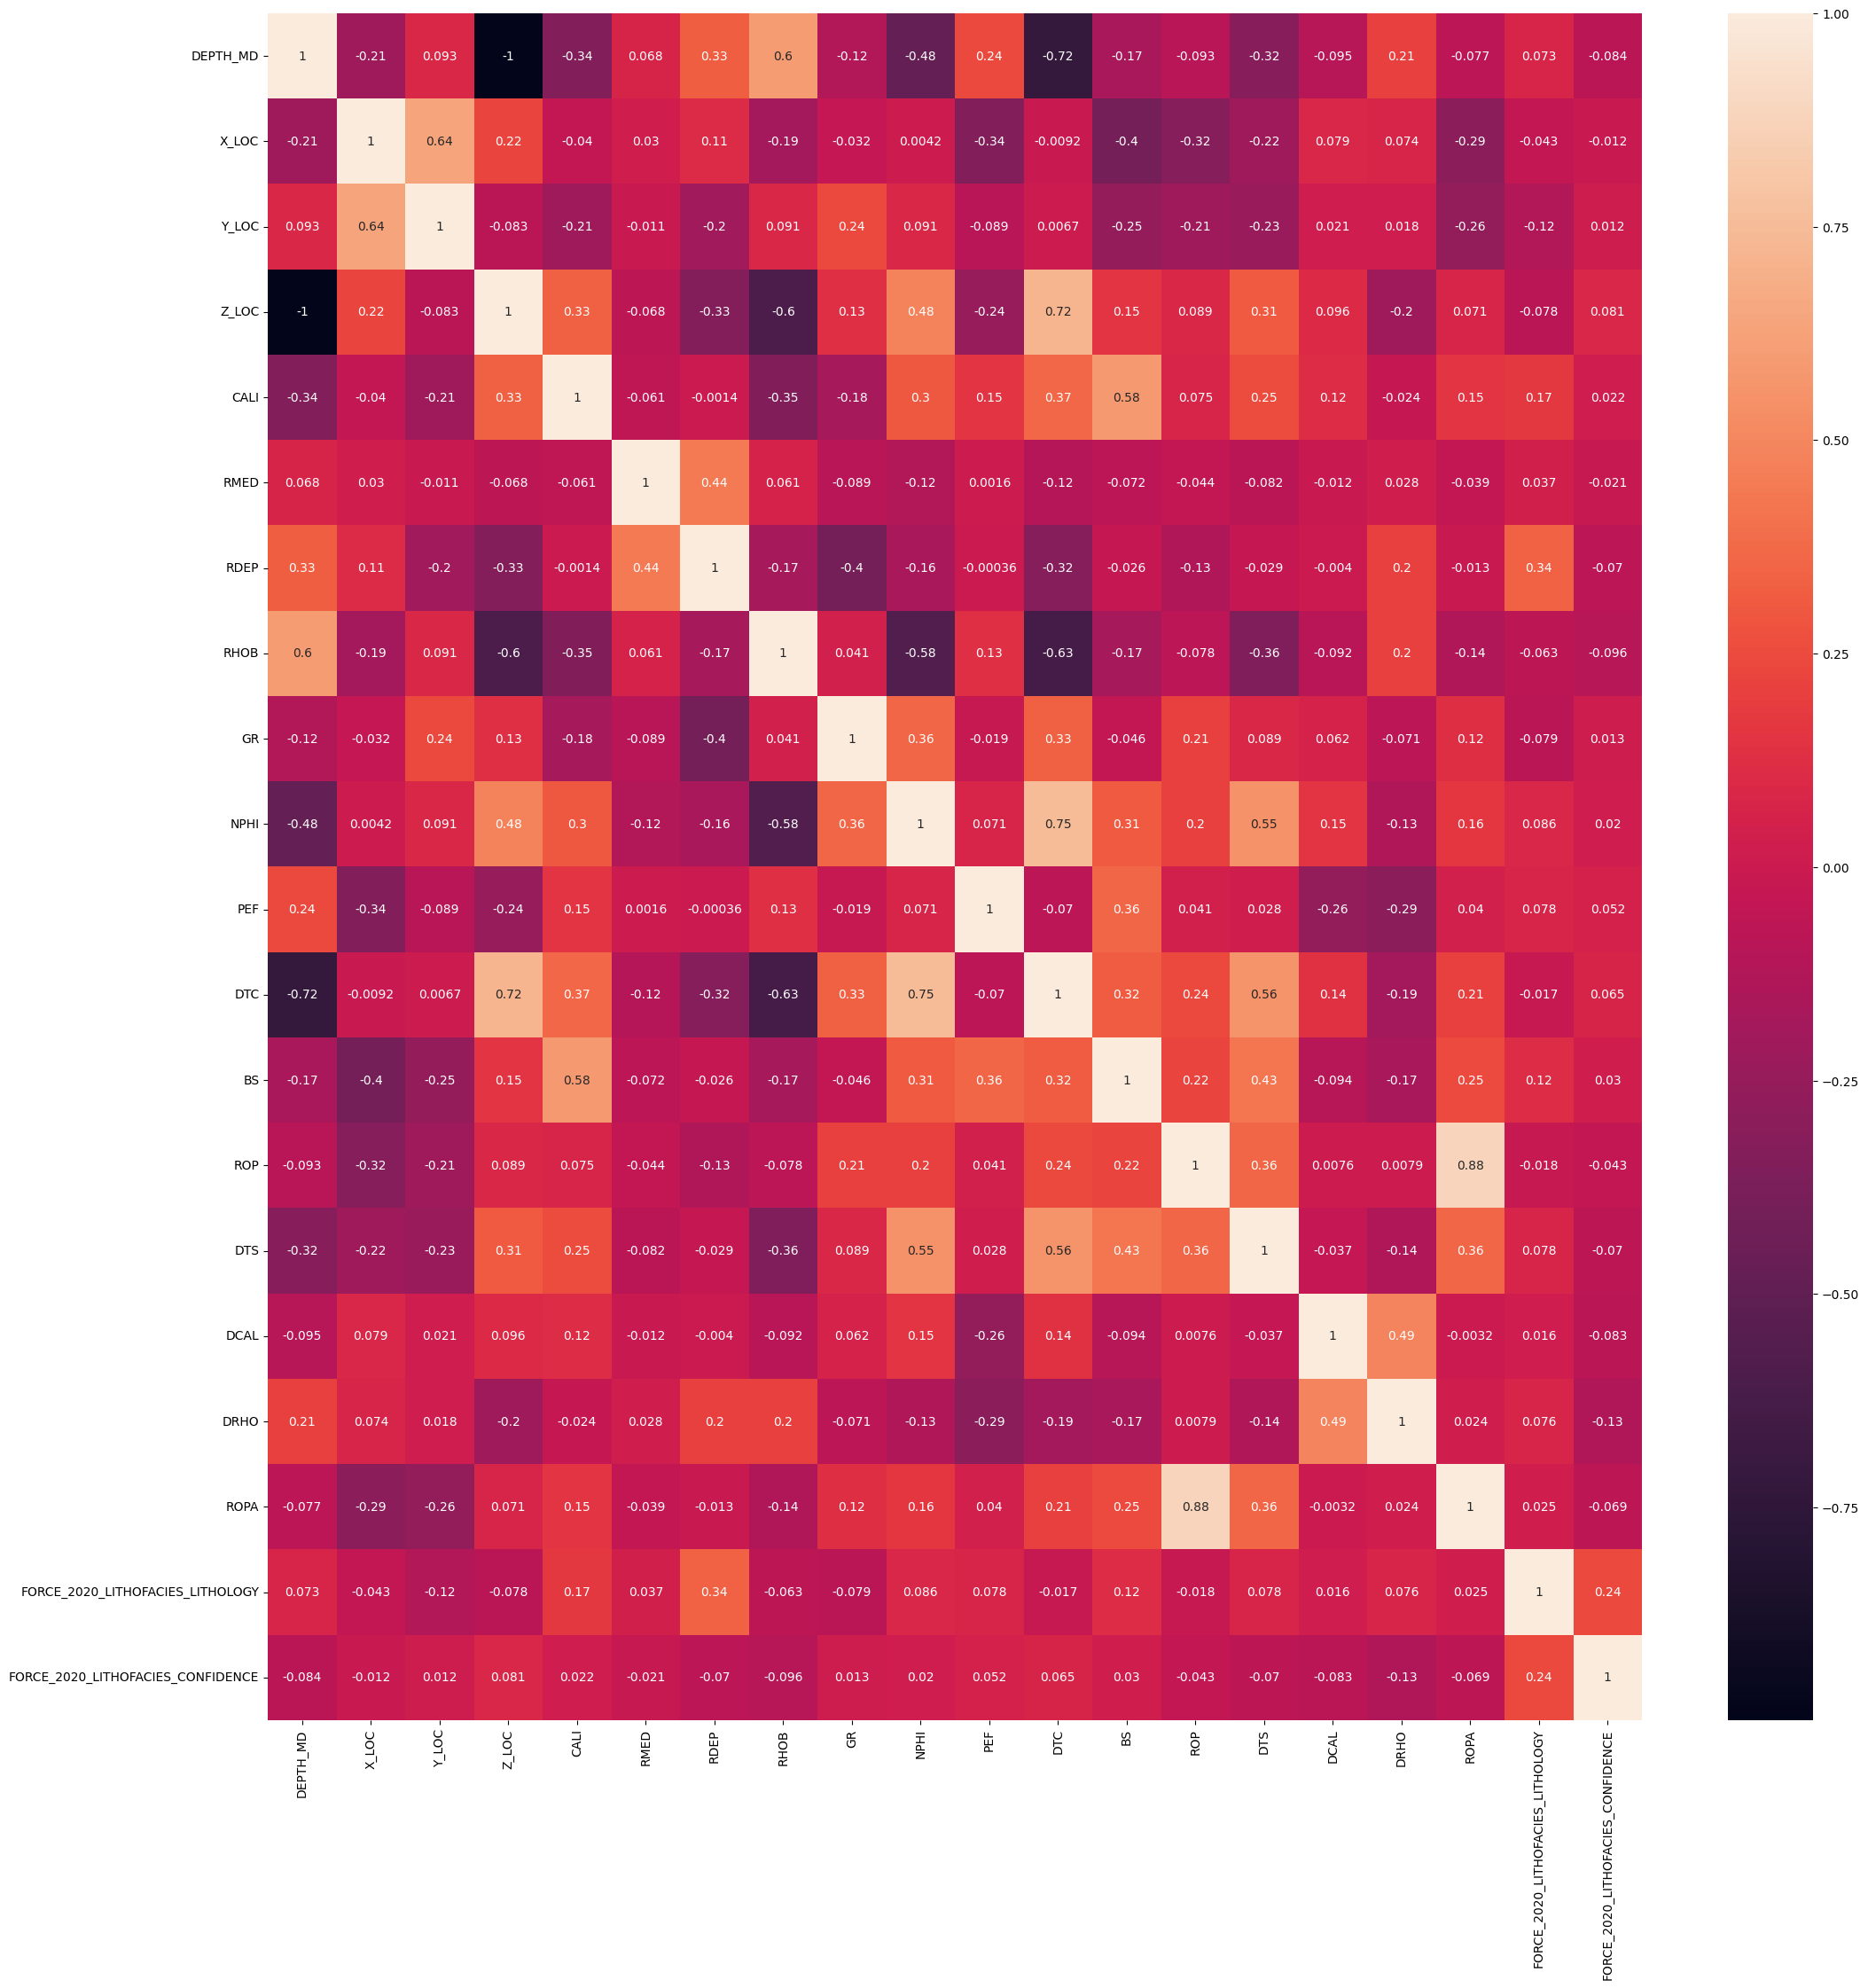

In [48]:
plt.figure(figsize=(25, 25))
sns.heatmap(corr_matrix, annot=True)
plt.show()

array([[<Axes: title={'center': 'DEPTH_MD'}>,
        <Axes: title={'center': 'X_LOC'}>,
        <Axes: title={'center': 'Y_LOC'}>,
        <Axes: title={'center': 'Z_LOC'}>],
       [<Axes: title={'center': 'CALI'}>,
        <Axes: title={'center': 'RMED'}>,
        <Axes: title={'center': 'RDEP'}>,
        <Axes: title={'center': 'RHOB'}>],
       [<Axes: title={'center': 'GR'}>, <Axes: title={'center': 'NPHI'}>,
        <Axes: title={'center': 'PEF'}>, <Axes: title={'center': 'DTC'}>],
       [<Axes: title={'center': 'BS'}>, <Axes: title={'center': 'ROP'}>,
        <Axes: title={'center': 'DTS'}>,
        <Axes: title={'center': 'DCAL'}>],
       [<Axes: title={'center': 'DRHO'}>,
        <Axes: title={'center': 'ROPA'}>,
        <Axes: title={'center': 'FORCE_2020_LITHOFACIES_LITHOLOGY'}>,
        <Axes: title={'center': 'FORCE_2020_LITHOFACIES_CONFIDENCE'}>]],
      dtype=object)

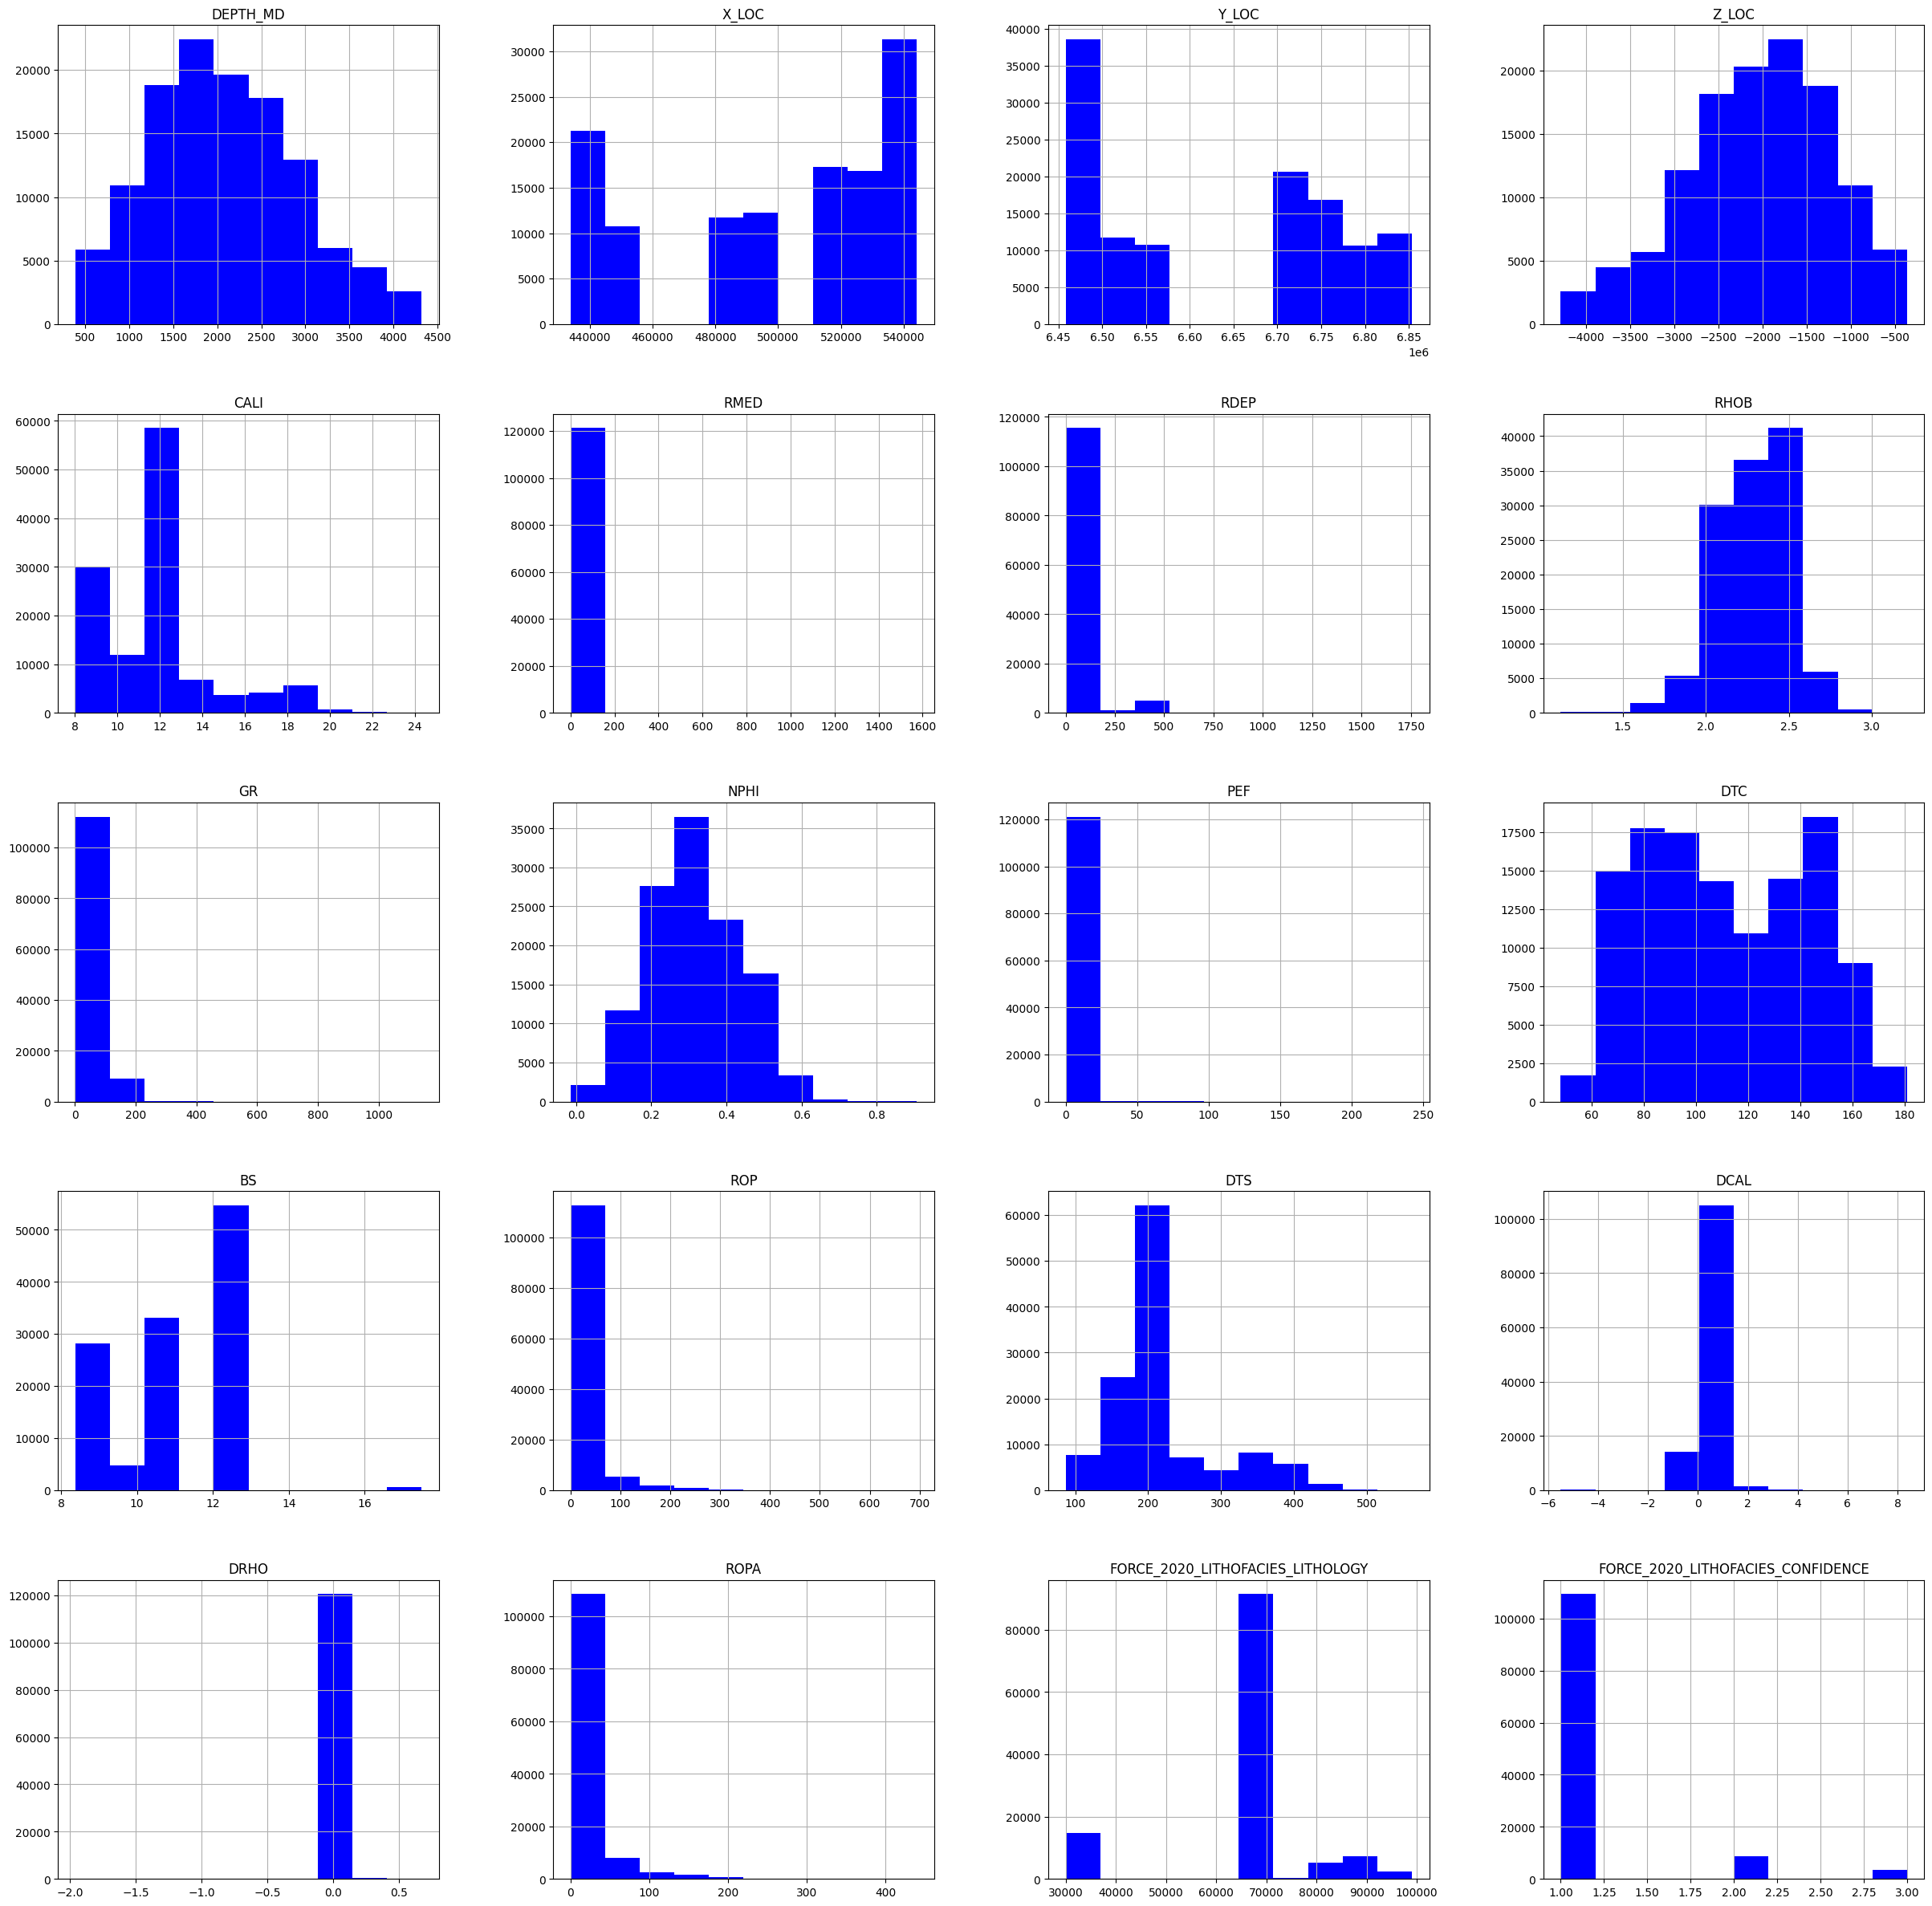

In [49]:
df.hist(bins=10, figsize=(30, 30), color='b')

In [ ]:
sns.paiplot(df)

In [29]:
#print(f'Уникальных скважин - {df.WELL.nunique()}')

In [30]:
#df.WELL.unique()

In [31]:
lithology_keys = {30000: 'Sandstone',
                  65030: 'Sandstone/Shale',
                  65000: 'Shale',
                  80000: 'Marl',
                  74000: 'Dolomite',
                  70000: 'Limestone',
                  70032: 'Chalk',
                  88000: 'Halite',
                  86000: 'Anhydrite',
                  99000: 'Tuff',
                  90000: 'Coal',
                  93000: 'Basement'}

In [32]:
df['FORCE_2020_LITHOFACIES_LITHOLOGY'].unique()

array([65000., 65030., 70000., 30000., 99000., 70032., 80000., 90000.,
       86000., 74000., 88000.])

In [33]:
df['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts()

FORCE_2020_LITHOFACIES_LITHOLOGY
65000.0    69305
30000.0    14794
65030.0    10507
70000.0     8721
88000.0     6498
80000.0     5266
70032.0     2905
99000.0     2366
86000.0      597
74000.0      269
90000.0      196
Name: count, dtype: int64

In [34]:
#df[df['WELL'].isna()]['FORCE_2020_LITHOFACIES_LITHOLOGY'].unique()

In [35]:
#df = df.dropna(subset=['FORCE_2020_LITHOFACIES_LITHOLOGY'])

In [36]:
#df[df['WELL'].isna()]['FORCE_2020_LITHOFACIES_LITHOLOGY'].unique()

<Axes: >

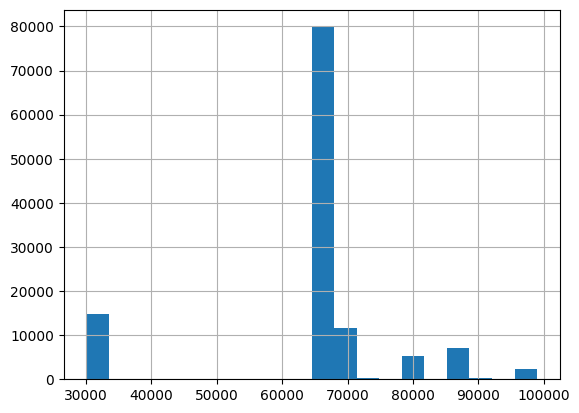

In [37]:
df['FORCE_2020_LITHOFACIES_LITHOLOGY'].hist(bins=20)

In [38]:
counts = df['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts()
counts

FORCE_2020_LITHOFACIES_LITHOLOGY
65000.0    69305
30000.0    14794
65030.0    10507
70000.0     8721
88000.0     6498
80000.0     5266
70032.0     2905
99000.0     2366
86000.0      597
74000.0      269
90000.0      196
Name: count, dtype: int64

C:\Users\tatya\AppData\Local\Temp\ipykernel_1404\3616021113.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names, rotation=45)


Text(0, 0.5, 'Lithology presence (\\%)')

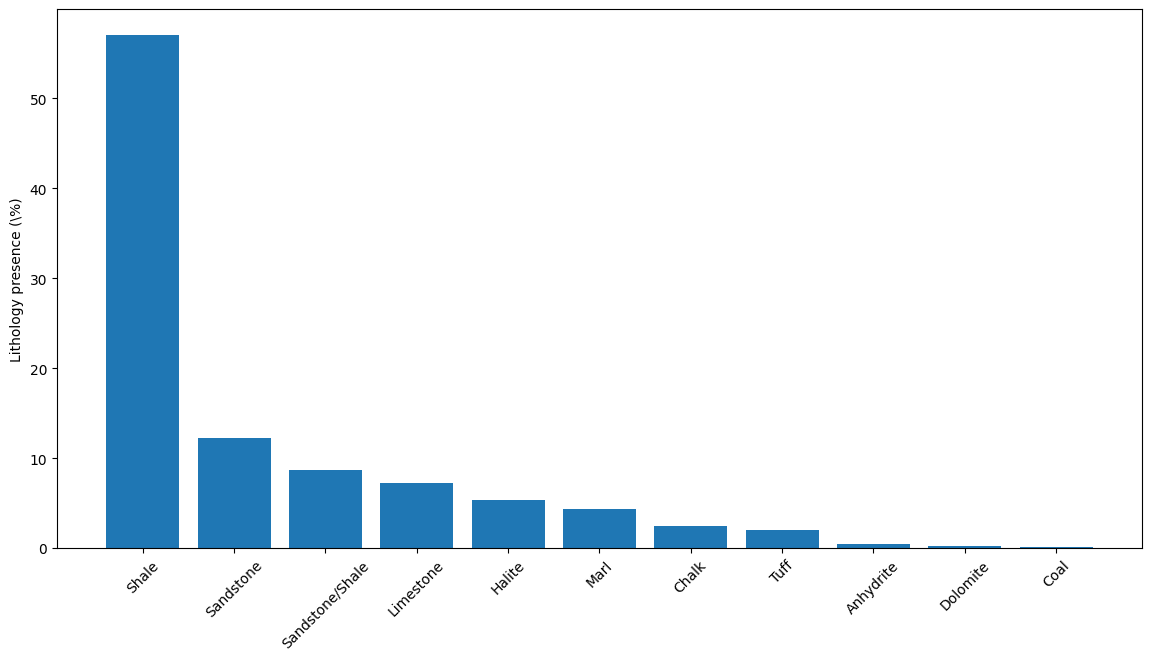

In [39]:
counts = df['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts()
names = []
percentage = []
N = df['FORCE_2020_LITHOFACIES_LITHOLOGY'].shape[0]
for item in counts.items():
    names.append(lithology_keys[item[0]])
    percentage.append(float(item[1])/N*100)
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
ax.bar(x=np.arange(len(names)), height=percentage)
ax.set_xticklabels(names, rotation=45)
ax.set_xticks(np.arange(len(names)))
ax.set_ylabel('Lithology presence (\%)')

In [40]:
df.shape

(121424, 20)

In [41]:
df.isna().sum()

DEPTH_MD                             0
X_LOC                                0
Y_LOC                                0
Z_LOC                                0
CALI                                 0
RMED                                 0
RDEP                                 0
RHOB                                 0
GR                                   0
NPHI                                 0
PEF                                  0
DTC                                  0
BS                                   0
ROP                                  0
DTS                                  0
DCAL                                 0
DRHO                                 0
ROPA                                 0
FORCE_2020_LITHOFACIES_LITHOLOGY     0
FORCE_2020_LITHOFACIES_CONFIDENCE    0
dtype: int64

1. Идентификаторы и местоположение скважины:
● WELL - уникальный идентификатор скважины;
● DEPTH_MD - измеренная глубина (MD) в метрах (вертикальное
расстояние по стволу скважины);
● X_LOC, Y_LOC - восточная и северная координата;
● Z_LOC - глубина по вертикали (высота относительно уровня
моря, отличается от DEPTH_MD);

2. Геологическая информация:
● GROUP - более широкая геологическая группировка
информации;

● FORMATION - конкретная геологическая формация на заданной
глубине (более узкая характеристика, чем GROUP);
● FORCE_2020_LITHOFACIES_LITHOLOGY - целевая
переменная: литология (тип попроды) на каждой глубине.
Категориальная переменная, представлена в виде числового кода;
● FORCE_2020_LITHOFACIES_CONFIDENCE - уверенность в
назначенной литологической метке.

3. Измерения каротажа скважин:
● CALI - кавернометрия (измерение диаметра скважины);
● RSHA - каротаж поверхностного сопротивления;
● RMED - каротаж среднего сопротивления;
● RDEP - каротаж глубокого сопротивления;
● RHOB - каротаж объемной плотности;
● GR - каротаж гамма-излучения;
● SGR - спектральный гамма-каротаж;
● NPHI - каротаж нейтронной пористости;
● PEF - каротаж фотоэлектрического фактора;
● DTC: акустический каротаж (время распространения звуковой
волны);
● SP - каротаж спонтанного потенциала;
● BS - размер долота (диаметр);
● ROP - скорость бурения;
● DTS - каротаж скорости сдвиговой волны;
● DCAL - разница между размером кавернометра и долота;
● DRHO - поправка на плотность;
● MUDWEIGHT - плотность бурового раствора;
● RMIC - каротаж микросопротивления;
● ROPA - обработанное/интерпретированное измерение
сопротивления;
● RXO - удельное сопротивление промытой зоны.

In [42]:
df.to_csv('data/df_01.csv')